# Решение обыкновенных дифференциальных уравнений численными методами: сравнение подходов и реализаций

В качестве примера в данном ноутбуке предлагается модель логистического роста. Это очень простое и очень базовое дифференциальное уравнение. Оно встречается в огромном числе практических задач, например при описании роста популяции (людей, животных, вирусов и пр.), при моделировании экономических показателей и во многих других случаях. Также Вы *можете заменить логистическую функцию роста на своё любимое дифференциальное уравнение*.

Сегодня будем рассматривать базовые реализации "решателей" - реализаций методов решения ОДУ, доступных в популярных пакетах Python. 

Пакеты из раздела 5 имеют трудности при установке, поэтому этот раздел является дополнительным и приступать к нему следует в том случае, когда выполнены все остальные задания. Так, например, пакеты решения ОДУ в Python и многих других языках программирования (например, Julia, который мы рассмотрим в следующий раз) часто имеют зависимости от Fortran и пакета SUNDIALS. Установка этих библиотек имеет некоторые трудности при сборке и установке на различные окружения и операционные системы. Зависимости от Fortran в свою очередь любопытны производительностью и точностью получаемых решений.

**Содержание:**
- Разделы 1-4 показывают как работать с ОДУ в Python без использования специализированных библиотек. 
- Раздел 6 - это Ваше основное задание по практической работе.
- Раздел 5 - дополнительное исследовательское задание с использованием специализированных библиотек, визуализацией Manim и примером работы с системой дифференциальных уравнений в системной динамике. В задании 5.4. будет просто установить библиотеку и получить результат, а дополнительно приведена ссылка на сайт, где можно изучить использованную модель, поэтому даже если остальные задания раздела 5 выполнить не удаётся, тут вероятно всё получится.
- Раздел 7 предлагает некоторые дальнейшие упражнения для отработки практических навыков работы с ОДУ в Python.

**Настоятельная просьба выполнять работы самостоятельно**, а не заимствовать работы у коллег или AI-ассистентов. Только Вы ответственны за получаемые знания и свои интеллектуальные мускулы (не говоря уже о Кодексе студента ИТМО, за нарушение положений которого предполагается отвественность вплоть до отчисления). 

## 1. Постановка задачи: Модель логистического роста

Уравнение логистического роста моделирует динамику численности популяции в условиях ограниченных ресурсов. Оно задается формулой:

$$
\frac{dy}{dt} = r\, y \Bigl( 1 - \frac{y}{K} \Bigr),
$$

где

- **y(t)** - численность населения в момент времени *t*
- **r** - внутренняя скорость роста
- **K** - пропускная способность (ограничения ресурсов)

Аналитическим решением является:

$$
y(t) = \frac{K}{1+\Bigl(\frac{K-y_0}{y_0}\Bigr)e^{-r t}},
$$

Определим наши параметры и построим аналитическое решение.

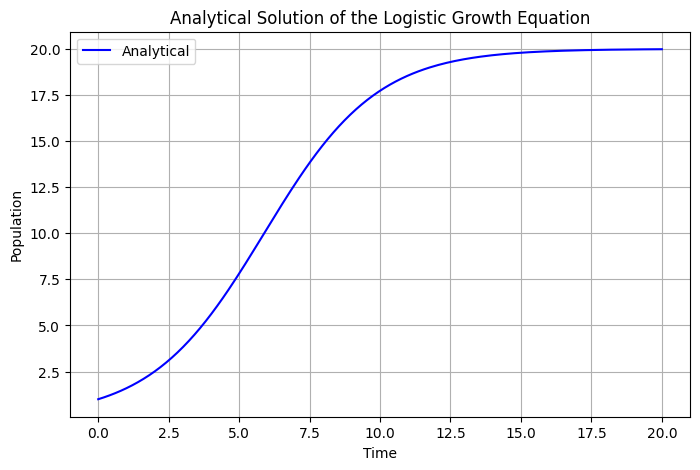

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define logistic growth parameters
r = 0.5         # Growth rate
K = 20          # Carrying capacity
y0 = 1          # Initial population

t_start = 0
t_end = 20
t_points = np.linspace(t_start, t_end, 200)

def analytical_solution(t, r, K, y0):
    return K / (1 + ((K - y0) / y0) * np.exp(-r * t))

y_analytical = analytical_solution(t_points, r, K, y0)

plt.figure(figsize=(8,5))
plt.plot(t_points, y_analytical, 'b-', label='Analytical')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Analytical Solution of the Logistic Growth Equation')
plt.legend()
plt.grid(True)
plt.show()


## 2. Пользовательские реализации решателей ОДУ

В этом разделе мы реализуем три метода:

* Метод Эйлера
* Улучшенный метод Эйлера (метод Хойна)
* Метод Рунге-Кутты 4-го порядка (RK4)

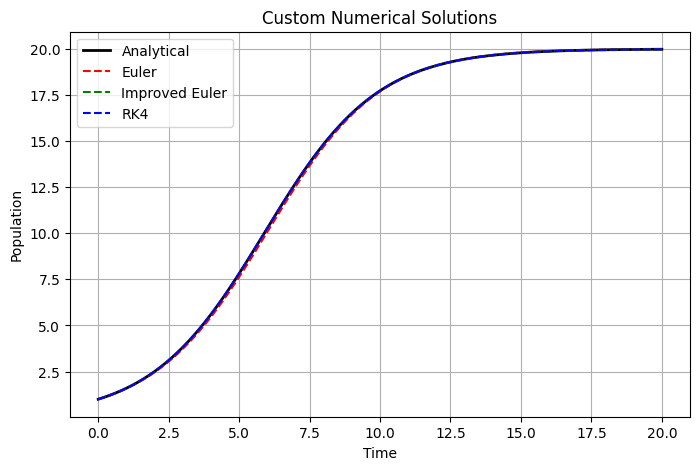

In [11]:
# The logistic derivative function
def logistic_deriv(t, y, r, K):
    return r * y * (1 - y / K)

# Euler method implementation
def euler_method(f, t, y0, r, K):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        y[i] = y[i-1] + dt * f(t[i-1], y[i-1], r, K)
    return y

# Improved Euler (Heun's) method implementation
def improved_euler(f, t, y0, r, K):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = f(t[i-1], y[i-1], r, K)
        k2 = f(t[i], y[i-1] + dt*k1, r, K)
        y[i] = y[i-1] + dt * 0.5 * (k1 + k2)
    return y

# 4th-Order Runge-Kutta (RK4) implementation
def runge_kutta4(f, t, y0, r, K):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = f(t[i-1], y[i-1], r, K)
        k2 = f(t[i-1] + 0.5*dt, y[i-1] + 0.5*dt*k1, r, K)
        k3 = f(t[i-1] + 0.5*dt, y[i-1] + 0.5*dt*k2, r, K)
        k4 = f(t[i], y[i-1] + dt*k3, r, K)
        y[i] = y[i-1] + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
    return y

# Solve the logistic ODE using the custom methods
y_euler = euler_method(logistic_deriv, t_points, y0, r, K)
y_improved = improved_euler(logistic_deriv, t_points, y0, r, K)
y_rk4 = runge_kutta4(logistic_deriv, t_points, y0, r, K)

# Plot the numerical solutions vs. the analytical solution
plt.figure(figsize=(8,5))
plt.plot(t_points, y_analytical, 'k-', lw=2, label='Analytical')
plt.plot(t_points, y_euler, 'r--', label='Euler')
plt.plot(t_points, y_improved, 'g--', label='Improved Euler')
plt.plot(t_points, y_rk4, 'b--', label='RK4')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Custom Numerical Solutions')
plt.legend()
plt.grid(True)
plt.show()


## 3. Использование ODE-решателей SciPy

Программа solve_ivp от SciPy предоставляет надежные адаптивные решатели. В приведенной ниже ячейке решим логистическую задачу ODE, используя `RK45` (явный метод Рунге-Кутты), и отобразим результат.

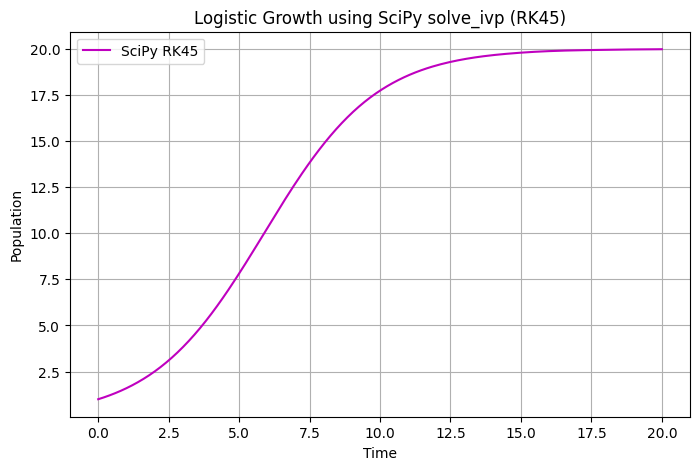

In [12]:
from scipy.integrate import solve_ivp

def logistic_ivp(t, y):
    return r * y * (1 - y / K)

sol = solve_ivp(logistic_ivp, [t_start, t_end], [y0], t_eval=t_points, method='RK45')

plt.figure(figsize=(8,5))
plt.plot(sol.t, sol.y[0], 'm-', label='SciPy RK45')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Logistic Growth using SciPy solve_ivp (RK45)')
plt.legend()
plt.grid(True)
plt.show()


## 4. Аналитическое решение с помощью Sympy

Теперь решим задачу Коши для логистической функции роста символьно с помощью Sympy.

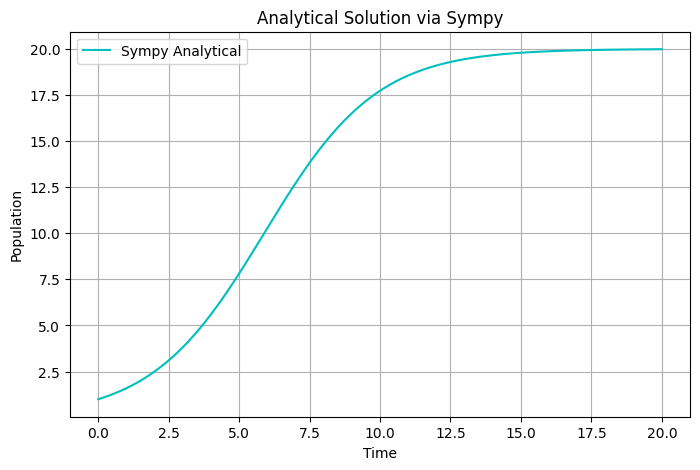

In [13]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

t_sym = sp.symbols('t')
y_sym = sp.Function('y')(t_sym)

# Define the ODE in symbolic form
ode = sp.Eq(sp.diff(y_sym, t_sym), r * y_sym * (1 - y_sym/K))

# Solve the ODE symbolically
sol_sym = sp.dsolve(ode, y_sym, ics={y_sym.subs(t_sym, 0): y0})

# Convert the symbolic solution to a numerical function
sol_sym_func = sp.lambdify(t_sym, sol_sym.rhs, 'numpy') # Get the right-hand side of the equation

# Evaluate the numerical function at t_points
y_sol_sym = sol_sym_func(t_points)

plt.figure(figsize=(8,5))
plt.plot(t_points, y_sol_sym, 'c-', label='Sympy Analytical') # Plot the numerical solution
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Analytical Solution via Sympy')
plt.legend()
plt.grid(True)
plt.show()


## 5. * Использование других библиотек (опциональное задание)

В следующих разделах мы используем дополнительные библиотеки для решения логистической задачи ODE. Многие из этих пакетов особенно полезны в продвинутых приложениях (например, нейронные сети, крупномасштабное моделирование или гибридные подходы). 

### 5.1 Assimulo и scikits.odes

Фреймворк Assimulo (через scikits.odes) предоставляет доступ к решателям из пакета SUNDIALS. Если она у вас не установлена, запустите приведенную ниже ячейку.

Ниже приведен пример настройки с использованием scikits.odes.

In [24]:
!pip install Assimulo

     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
     ------------- -------------------------- 0.5/1.6 MB 4.2 MB/s eta 0:00:01
     ---------------------------------------- 1.6/1.6 MB 6.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      Traceback (most recent call last):
        File "C:\Users\gafur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 389, in <module>
          main()
        File "C:\Users\gafur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
                                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\gafur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_proces

In [25]:
!pip install scikits.odes

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metada

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [32 lines of output]
      + meson setup C:\Users\gafur\AppData\Local\Temp\pip-install-yqg1zavp\scikits-odes-daepack_4d7c8de4d4144434be4d4efb8bc70c7f C:\Users\gafur\AppData\Local\Temp\pip-install-yqg1zavp\scikits-odes-daepack_4d7c8de4d4144434be4d4efb8bc70c7f\.mesonpy-7ndrrzao -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md -Dpython.install_env=auto --native-file=C:\Users\gafur\AppData\Local\Temp\pip-install-yqg1zavp\scikits-odes-daepack_4d7c8de4d4144434be4d4efb8bc70c7f\.mesonpy-7ndrrzao\meson-python-native-file.ini
      The Meson build system
      Version: 1.7.2
      Source dir: C:\Users\gafur\AppData\Local\Temp\pip-install-yqg1zavp\scikits-odes-daepack_4d7c8de4d4144434be4d4efb8bc70c7f
      Build dir: C:\Users\gafur\AppData\Local\Temp\pip-install-yqg1zavp\scikits-odes-daepack_4d7c8de4d4144434be4d4efb8bc70c7f\.mesonpy-7ndrrzao
      Build type: nat

In [26]:
try:
    from scikits.odes.ode import ode

    def f_scikits(t, y, r, K):
        return [r * y[0] * (1 - y[0] / K)]
    
    # Set up the solver using CVODE from the SUNDIALS suite
    solver = ode('cvode',
                 f_scikits,
                 rtol=1e-6,
                 atol=1e-6,
                 params=(r, K))
    
    result = solver.solve(t_points, [y0])
    y_scikits = np.array([pt[0] for pt in result.values])
    
    plt.figure(figsize=(8,5))
    plt.plot(result.times, y_scikits, 'orange', label='scikits.odes CVODE')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Logistic Growth via scikits.odes')
    plt.legend()
    plt.grid(True)
    plt.show()
except ImportError:
    print('scikits.odes is not installed. Please run: !pip install scikits.odes')


scikits.odes is not installed. Please run: !pip install scikits.odes


### 5.2 PyDSTool

PyDSTool - это комплексная среда для моделирования динамических систем. Если она не установлена, запустите ячейку ниже.

Далее приведен пример того, как определить и решить задачу Коши для логистической функции роста с помощью PyDSTool.

In [27]:
!pip install PyDSTool

   ---------------------------------------- 0.0/4.4 MB ? eta -:--:--
   ---- ----------------------------------- 0.5/4.4 MB 4.2 MB/s eta 0:00:01
   ---------------- ----------------------- 1.8/4.4 MB 7.7 MB/s eta 0:00:01
   ------------------------------------- -- 4.2/4.4 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------- 4.4/4.4 MB 7.6 MB/s eta 0:00:00


In [28]:
try:
    from PyDSTool import args, Generator

    # Define model parameters and initial condition
    pars = {'r': r, 'K': K}
    ics = {'y': y0}

    ds_args = args(name='LogisticModel')
    ds_args.pars = pars
    ds_args.varspecs = {'y': 'r*y*(1 - y/K)'}
    ds_args.ics = ics
    ds_args.tdomain = [t_start, t_end]

    ode_system = Generator.Vode_ODEsystem(ds_args)
    traj = ode_system.compute('test')
    pts = traj.sample()
    t_pydstool = pts['t']
    y_pydstool = pts['y']

    plt.figure(figsize=(8,5))
    plt.plot(t_pydstool, y_pydstool, 'purple', label='PyDSTool Vode')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Logistic Growth using PyDSTool')
    plt.legend()
    plt.grid(True)
    plt.show()
except ImportError:
    print('PyDSTool is not installed. Please run: !pip install PyDSTool')


PyDSTool is not installed. Please run: !pip install PyDSTool


### 5.3 Torchdiffeq

Torch diff eq - это библиотека для дифференцируемого решения ODE, полезная при интеграции с моделями нейронных сетей.

В приведенном ниже примере используется Torchdiffeq (совместно с PyTorch) для решения задачи Коши для логистической функции роста.

In [29]:
!pip install torchdiffeq

   ---------------------------------------- 0.0/204.2 MB ? eta -:--:--
   ---------------------------------------- 0.5/204.2 MB 4.2 MB/s eta 0:00:49
    --------------------------------------- 2.6/204.2 MB 7.6 MB/s eta 0:00:27
    --------------------------------------- 5.0/204.2 MB 9.2 MB/s eta 0:00:22
   - -------------------------------------- 8.1/204.2 MB 10.7 MB/s eta 0:00:19
   -- ------------------------------------- 10.2/204.2 MB 10.8 MB/s eta 0:00:18
   -- ------------------------------------- 12.8/204.2 MB 10.9 MB/s eta 0:00:18
   -- ------------------------------------- 15.2/204.2 MB 11.0 MB/s eta 0:00:18
   --- ------------------------------------ 17.6/204.2 MB 11.1 MB/s eta 0:00:17
   --- ------------------------------------ 19.4/204.2 MB 11.1 MB/s eta 0:00:17
   ---- ----------------------------------- 21.8/204.2 MB 10.9 MB/s eta 0:00:17
   ---- ----------------------------------- 23.6/204.2 MB 10.7 MB/s eta 0:00:17
   ---- ----------------------------------- 25.2/204.2 M

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [30]:
try:
    import torch
    from torchdiffeq import odeint as torch_odeint

    class LogisticODE(torch.nn.Module):
        def forward(self, t, y):
            return r * y * (1 - y / K)

    device = torch.device('cpu')
    y0_torch = torch.tensor([y0], dtype=torch.float32, device=device)
    t_torch = torch.linspace(t_start, t_end, steps=200, dtype=torch.float32, device=device)

    logistic_model = LogisticODE()
    y_torch = torch_odeint(logistic_model, y0_torch, t_torch, method='rk4')

    y_torch_np = y_torch.squeeze().cpu().numpy()

    plt.figure(figsize=(8,5))
    plt.plot(t_torch.cpu().numpy(), y_torch_np, 'brown', label='Torchdiffeq RK4')
    plt.xlabel('Time')
    plt.ylabel('Population')
    plt.title('Logistic Growth using Torchdiffeq')
    plt.legend()
    plt.grid(True)
    plt.show()
except ImportError:
    print('Torchdiffeq is not installed. Please run: !pip install torchdiffeq')


Torchdiffeq is not installed. Please run: !pip install torchdiffeq


### 5.4. Системная динамика и PySD

PySD - это Open Source инструмент для расчёта моделей системной динамики, которые в основе своей представляют систему дифференциальных уравнений.

[Тут](#https://www.labxchange.org/library/items/lb:LabXchange:f223e947:lx_simulation:1?fullscreen=true) можно больше узнать про приведённую модель Лотки-Вольтерра, посмотреть графики, симуляции и сравнить решение.

In [ ]:
!pip install pysd==3.14.3

Files removed: 1414 (920.4 MB)


In [81]:
!pip show pysd

Name: pysd
Version: 3.14.3
Summary: System Dynamics Modeling in Python
Home-page: https://github.com/SDXorg/pysd
Author: PySD contributors
Author-email: 
License: LICENSE
Location: C:\Users\gafur\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages
Requires: black, chardet, lxml, numpy, openpyxl, pandas, parsimonious, portion, progressbar2, regex, scipy, xarray
Required-by: 


In [ ]:
import pysd
import matplotlib.pyplot as plt

# -------------------------------
# 1. Create the model file
# -------------------------------
model_definition = """
<xmile xmlns="http://docs.oasis-open.org/xmile/ns/XMILE/v1.0" version="1.0">
    <isee:prefs show_module_prefix="true" layer="model"/>
    <header>
        <options namespace="std"/>
        <vendor>Ventana Systems, xmutil</vendor>
        <product lang="en">Vensim, xmutil</product>
    </header>
    <sim_specs method="Euler" time_units="seasons" isee:sim_duration="0">
        <start>0</start>
        <stop>12</stop>
        <dt>0.03125</dt>
    </sim_specs>
    <model_units/>
    <dimensions/>
    <model>
        <variables>
            <flow name="prey deaths">
                <eqn>(prey_death_proportionality_constant*Predator_Population)*Prey_Population</eqn>
            </flow>
            <aux name="prey death proportionality constant">
                <eqn>0.035</eqn>
                <units>1</units>
            </aux>
            <flow name="prey births">
                <eqn>prey_birth_fraction*Prey_Population</eqn>
            </flow>
            <aux name="prey birth fraction">
                <eqn>1</eqn>
                <units>1</units>
            </aux>
            <flow name="predator deaths">
                <eqn>predator_death_proportionality_constant*Predator_Population</eqn>
            </flow>
            <flow name="predator births">
                <eqn>(predator_birth_fraction*Prey_Population)*Predator_Population</eqn>
            </flow>
            <stock name="Prey Population">
                <inflow>prey_births</inflow>
                <outflow>prey_deaths</outflow>
                <eqn>100</eqn>
            </stock>
            <aux name="predator death proportionality constant">
                <eqn>1</eqn>
                <units>1</units>
            </aux>
            <stock name="Predator Population">
                <inflow>predator_births</inflow>
                <outflow>predator_deaths</outflow>
                <eqn>15</eqn>
            </stock>
            <aux name="predator birth fraction">
                <eqn>0.01</eqn>
                <units>1</units>
            </aux>
        </variables>
    </model>
</xmile>

"""

model_filename = "lotka_volterra.xmile"
with open(model_filename, "w") as f:
    f.write(model_definition)

# -------------------------------
# 2. Load the model using PySD
# -------------------------------
model = pysd.read_xmile(model_filename)

# -------------------------------
# 3. Set simulation parameters
# -------------------------------
initial_time = 0      # Start time
final_time = 50       # End time
time_step = 0.1       # Simulation time step

# -------------------------------
# 4. Run simulation with different solvers
# -------------------------------
# Run simulation using the Euler integration method
results_euler = model.run(
    initial_condition="original",
    final_time=final_time,
    time_step=time_step
)

# print(results_euler)
print(type(results_euler))
print(results_euler.columns)


# -------------------------------
# 5. Plot the results
# -------------------------------
plt.figure(figsize=(12, 6))
plt.plot(results_euler.index, results_euler['Prey Population'], label='Prey', linestyle='-')
plt.plot(results_euler.index, results_euler['Predator Population'], label='Predator', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Lotka-Volterra Predator-Prey Dynamics')
plt.legend()
plt.grid(True)
plt.show()

### 5.5 Визуализация Manim

В этом разделе мы используем библиотеку Minim для создания динамической визуализации решения по развитию логистики. В анимации будет отображаться логистическая кривая вместе с движущейся точкой, которая отслеживает её изменение с течением времени.

Мы будем использовать сцену Manim для анимации процесса решения задачи Коши.

In [57]:
!pip install manim

In [58]:
!pip install jupyter

In [59]:
%%manim -ql -v WARNING LogisticGrowthScene

from manim import *
import numpy as np

class LogisticGrowthScene(Scene):
    def construct(self):
        # Parameters
        r = 0.5
        K = 20
        y0 = 1
        t_end = 20
        
        # Setup axes
        axes = Axes(
            x_range=[0, t_end, 5],
            y_range=[0, K+5, 5],
            x_length=10,
            y_length=6,
            axis_config={"include_numbers": True},
            tips=True
        ).to_edge(DOWN)
        
        # Define the logistic function
        logistic = lambda t: K / (1 + ((K - y0) / y0) * np.exp(-r * t))
        
        # Create axes and plot the logistic curve
        self.play(Create(axes))
        graph = axes.plot(logistic, color=BLUE)
        self.play(Create(graph))
        
        # Introduce a dot that will trace the logistic curve
        dot = Dot(color=RED).move_to(axes.c2p(0, logistic(0)))
        self.add(dot)
        
        dot_tracker = ValueTracker(0)
        dot.add_updater(lambda m: m.move_to(axes.c2p(dot_tracker.get_value(), logistic(dot_tracker.get_value()))))
        
        self.play(dot_tracker.animate.set_value(t_end), run_time=6, rate_func=linear)
        self.wait()


UsageError: Cell magic `%%manim` not found.


## 6. Сравнение и размышление

### 6.1 Численный анализ методов и реализаций
Теперь, когда Вы рассчитали решение для логистического роста несколькими методами, обратите внимание (*напишите код в ячейке ниже и составьте таблицу или графики с полученными результатами*) на следующее:

- **Точность:** Насколько близко численные методы подходят к аналитическому решению?
- **Стабильность и сходимость:** Как проявляются ошибки при изменении размера шага или допусков?
- **Скорость работы метода и реализации:** Сравните низкоуровневые пользовательские реализации с высокоуровневыми библиотечными интерфейсами.

### 6.2. Вопросы для размышления:

1. Какие преимущества дают адаптивные решатели (например, в SciPy) по сравнению с методами с фиксированным шагом?
2. Можете ли Вы определить ситуации, когда простой метод (например, Эйлера) может привести к недопустимому росту ошибок?
3. Как выбор жесткого решателя помогает при работе с более сложными ОДУ?

Смело экспериментируйте с различными значениями параметров (например, с большей скоростью роста *r*) и наблюдайте за их влиянием на решение. Также Вы можете заменить логистическую функцию роста на своё любимое дифференциальное уравнение.

Method		Error		Execution Time
Euler		1.310585		0.000000
Improved Euler	0.024978		0.000919
RK4		0.000002		0.000000
SciPy RK45	0.051803		0.001054
Sympy		0.000000		0.833601


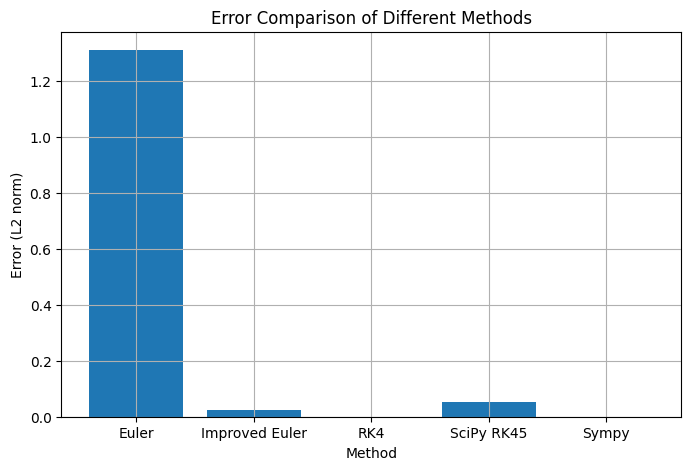

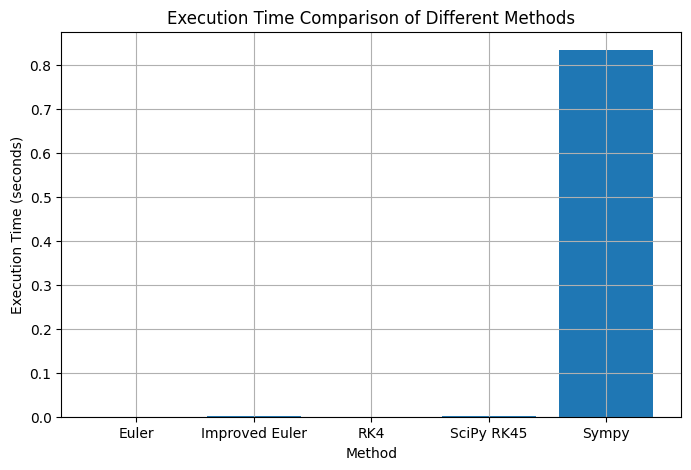

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sp
import time

# Define logistic growth parameters
r = 0.5         # Growth rate
K = 20          # Carrying capacity
y0 = 1          # Initial population

t_start = 0
t_end = 20
t_points = np.linspace(t_start, t_end, 200)

# The logistic derivative function
def logistic_deriv(t, y, r, K):
    return r * y * (1 - y / K)

# Euler method implementation
def euler_method(f, t, y0, r, K):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        y[i] = y[i-1] + dt * f(t[i-1], y[i-1], r, K)
    return y

# Improved Euler (Heun's) method implementation
def improved_euler(f, t, y0, r, K):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = f(t[i-1], y[i-1], r, K)
        k2 = f(t[i], y[i-1] + dt*k1, r, K)
        y[i] = y[i-1] + dt * 0.5 * (k1 + k2)
    return y

# 4th-Order Runge-Kutta (RK4) implementation
def runge_kutta4(f, t, y0, r, K):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i-1]
        k1 = f(t[i-1], y[i-1], r, K)
        k2 = f(t[i-1] + 0.5*dt, y[i-1] + 0.5*dt*k1, r, K)
        k3 = f(t[i-1] + 0.5*dt, y[i-1] + 0.5*dt*k2, r, K)
        k4 = f(t[i], y[i-1] + dt*k3, r, K)
        y[i] = y[i-1] + (dt/6) * (k1 + 2*k2 + 2*k3 + k4)
    return y

# Analytical solution function
def analytical_solution(t, r, K, y0):
    return K / (1 + ((K - y0) / y0) * np.exp(-r * t))

# Solve the logistic ODE using the custom methods
y_euler = euler_method(logistic_deriv, t_points, y0, r, K)
y_improved = improved_euler(logistic_deriv, t_points, y0, r, K)
y_rk4 = runge_kutta4(logistic_deriv, t_points, y0, r, K)

# Solve the logistic ODE using SciPy solve_ivp
def logistic_ivp(t, y):
    return r * y * (1 - y / K)

sol = solve_ivp(logistic_ivp, [t_start, t_end], [y0], t_eval=t_points, method='RK45')

# Solve the logistic ODE symbolically using Sympy
t_sym = sp.symbols('t')
y_sym = sp.Function('y')(t_sym)
ode = sp.Eq(sp.diff(y_sym, t_sym), r * y_sym * (1 - y_sym/K))
sol_sym = sp.dsolve(ode, y_sym, ics={y_sym.subs(t_sym, 0): y0})
sol_sym_func = sp.lambdify(t_sym, sol_sym.rhs, 'numpy')
y_sol_sym = sol_sym_func(t_points)

# Calculate the error for each method
y_analytical = analytical_solution(t_points, r, K, y0)
error_euler = np.linalg.norm(y_euler - y_analytical)
error_improved = np.linalg.norm(y_improved - y_analytical)
error_rk4 = np.linalg.norm(y_rk4 - y_analytical)
error_scipy = np.linalg.norm(sol.y[0] - y_analytical)
error_sympy = np.linalg.norm(y_sol_sym - y_analytical)

# Calculate the execution time for each method
start_time = time.time()
euler_method(logistic_deriv, t_points, y0, r, K)
euler_time = time.time() - start_time

start_time = time.time()
improved_euler(logistic_deriv, t_points, y0, r, K)
improved_time = time.time() - start_time

start_time = time.time()
runge_kutta4(logistic_deriv, t_points, y0, r, K)
rk4_time = time.time() - start_time

start_time = time.time()
solve_ivp(logistic_ivp, [t_start, t_end], [y0], t_eval=t_points, method='RK45')
scipy_time = time.time() - start_time

start_time = time.time()
t_sym = sp.symbols('t')
y_sym = sp.Function('y')(t_sym)
ode = sp.Eq(sp.diff(y_sym, t_sym), r * y_sym * (1 - y_sym/K))
sol_sym = sp.dsolve(ode, y_sym, ics={y_sym.subs(t_sym, 0): y0})
sol_sym_func = sp.lambdify(t_sym, sol_sym.rhs, 'numpy')
y_sol_sym = sol_sym_func(t_points)
sympy_time = time.time() - start_time

# Print the results in a table
print("Method\t\tError\t\tExecution Time")
print(f"Euler\t\t{error_euler:.6f}\t\t{euler_time:.6f}")
print(f"Improved Euler\t{error_improved:.6f}\t\t{improved_time:.6f}")
print(f"RK4\t\t{error_rk4:.6f}\t\t{rk4_time:.6f}")
print(f"SciPy RK45\t{error_scipy:.6f}\t\t{scipy_time:.6f}")
print(f"Sympy\t\t{error_sympy:.6f}\t\t{sympy_time:.6f}")

# Plot the errors
plt.figure(figsize=(8,5))
plt.bar(['Euler', 'Improved Euler', 'RK4', 'SciPy RK45', 'Sympy'], 
        [error_euler, error_improved, error_rk4, error_scipy, error_sympy])
plt.xlabel('Method')
plt.ylabel('Error (L2 norm)')
plt.title('Error Comparison of Different Methods')
plt.grid(True)
plt.show()

# Plot the execution times
plt.figure(figsize=(8,5))
plt.bar(['Euler', 'Improved Euler', 'RK4', 'SciPy RK45', 'Sympy'], 
        [euler_time, improved_time, rk4_time, scipy_time, sympy_time])
plt.xlabel('Method')
plt.ylabel('Execution Time (seconds)')
plt.title('Execution Time Comparison of Different Methods')
plt.grid(True)
plt.show()

Точность  
- Метод Эйлера обладает наибольшей погрешностью, так как его линейная точность приводит к значительным отклонениям от аналитического решения. 
- Улучшенный метод Эйлера, или метод Хойна, демонстрирует меньшую погрешность благодаря квадратичной точности. 
- Метод Рунге-Кутты 4-го порядка обеспечивает еще более низкую погрешность и качественно приближает аналитическое решение. 
- Использование `solve_ivp` из библиотеки SciPy с методом RK45 гарантирует высокую точность и близкое соответствие аналитическому решению. 
- Решение с помощью Sympy также отличается высокой точностью, так как представляет собой аналитическое решение в символьной форме, транформируемое в числовую функцию.

Стабильность и сходимость  
- Метод Эйлера обладает меньшей стабильностью и показывает быстрое увеличение ошибки при увеличении шага интегрирования. 
- Улучшенный метод Эйлера более стабилен, чем его предшественник, но сохраняет ограниченную точность на больших шагах. 
- Метод Рунге-Кутты 4-го порядка имеет хорошую стабильность и сходимость, что позволяет получать более точные результаты при различных размерах шага. 
- `solve_ivp` с методом RK45 использует адаптивный размер шага, что дает возможность автоматической подстройки для достижения необходимой точности и стабильности. 
- Решение с помощью Sympy основывается на точном аналитическом решении и не сталкивается с проблемами, связанными с ошибками численного интегрирования.

Скорость работы и реализация  
- Пользовательские реализации методов Эйлера, улучшенного Эйлера и Рунге-Кутты 4-го порядка имеют более низкую скорость по сравнению с библиотечными версиями. 
- `solve_ivp` из SciPy обеспечивают более высокую скорость работы благодаря оптимизации и использованию эффективных алгоритмов для решения ОДУ. 
- Решение с использованием Sympy требует наибольших вычислительных затрат из-за необходимости символьных вычислений для получения решения уравнения, которое затем преобразуется в числовую функцию. Однако результатом является точное аналитическое решение.

**6.2**

1. Преимущества адаптивных решателей в SciPy по сравнению с методами с фиксированным шагом  
- Точность: Адаптивные решатели, как RK45, автоматически изменяют размер шага, уменьшая его в сложных зонах для повышения точности и увеличивая в простых областях для ускорения вычислений. Методы с фиксированным шагом могут быть либо чрезмерно консервативными, либо недостаточно точными из-за плохо выбранного шага.  
- Эффективность: Адаптивные решатели более эффективны в использовании времени и ресурсов. В зонах с плавным переходом они могут увеличивать шаг, существенно ускоряя расчеты, тогда как фиксированные методы работают с одним, потенциально неэффективным шагом.  
- Удобство использования: Адаптивные решатели требуют меньше конфигурации, так как сами подбирают оптимальный шаг, избавляя разработчиков от необходимости определять его заранее.

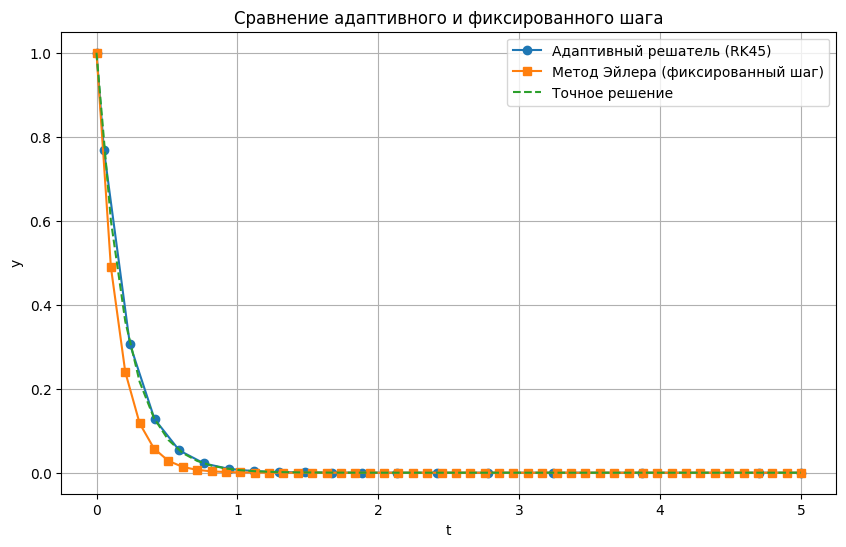

Метод			Ошибка
Адаптивный (RK45)	0.000272
Метод Эйлера		0.214726


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Определяем функцию правой части уравнения
def f(t, y):
    return -5 * y  # Пример простого ОДУ

# Адаптивный решатель с использованием SciPy
t_span_adaptive = [0, 5]
y0 = [1]
sol_adaptive = solve_ivp(f, t_span_adaptive, y0, method='RK45')

# Метод Эйлера с фиксированным шагом
def euler_method(f, t, y0):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        dt = t[i] - t[i - 1]
        y[i] = y[i - 1] + dt * f(t[i - 1], y[i - 1])
    return y

t_fixed = np.linspace(0, 5, 50)  # Фиксированный шаг
y_euler = euler_method(f, t_fixed, y0[0])

# Точное решение для сравнения
def exact_solution(t):
    return np.exp(-5 * t)

# График
plt.figure(figsize=(10, 6))
plt.plot(sol_adaptive.t, sol_adaptive.y[0], label='Адаптивный решатель (RK45)', marker='o')
plt.plot(t_fixed, y_euler, label='Метод Эйлера (фиксированный шаг)', marker='s')
plt.plot(t_fixed, exact_solution(t_fixed), label='Точное решение', linestyle='--')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Сравнение адаптивного и фиксированного шага')
plt.legend()
plt.grid(True)
plt.show()

# Таблица ошибок
error_adaptive = np.linalg.norm(sol_adaptive.y[0] - exact_solution(sol_adaptive.t))
error_euler = np.linalg.norm(y_euler - exact_solution(t_fixed))

print("Метод\t\t\tОшибка")
print(f"Адаптивный (RK45)\t{error_adaptive:.6f}")
print(f"Метод Эйлера\t\t{error_euler:.6f}")


2. Ситуации, когда метод Эйлера может вызывать рост ошибок  
- Быстрый рост функции: Если функция ОДУ быстро возрастает или резко изменяется, метод Эйлера накапливает ошибку. Например, при резком скачке численности популяции он может неверно предсказать дальнейшие изменения из-за линейного приближения.  
- Высокие частоты: При колебаниях с высокой частотой (например, в задачах с гармоническими осцилляторами) метод Эйлера не может точно следовать за изменениями, поскольку учитывает только первую производную.



3. Как жесткий решатель помогает в работе с более сложными ОДУ  
- Стабильность: Жесткие ОДУ могут вызывать нестабильность обычных методов. Жесткие решатели, специально разработанные для таких уравнений, обеспечивают более стабильные решения.  
- Точность: В области с особыми свойствами (например, сингулярности) жесткие решатели обеспечивают более точное приближение, эффективнее адаптируясь к изменениям функции.  
- Правильное моделирование динамики: Жесткие решатели точнее отображают динамику систем в зависимости от параметров и начальных условий, что критично для практических приложений в физике, биологии и экономике.

## 7. * Дальнейшее изучение

Для дальнейшего изучения вы можете:

- Реализовать самостоятельно и сравнить дополнительные методы, такие как метод Милна, методы Адамса-Мультона или Адамса-Башфорта.
- Изучить влияние изменений параметров или использовать зашумленные данные для оценки параметров.
- Подумайте о том, чтобы распространить эти идеи на уравнения в частных производных или системы ОДУ в будущих проектах.

Продуктивного программирования и погружения в задачу!